# 

# Parking forecasting with Scikit-learn and MLPRegression for Porthaninkatu 6
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [18]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    RAIN_BOOL,
    TEMPERATURE,
    YEAR,
    RAIN_VALUE,
)



## Load and prepare data

In [19]:
df_base, df_rain_train, df_rain_bool_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv", area="ce8f3960-fc3f-4cc7-87f5-9cd5532e09bc")

Filtered 18049 parkings.


## Create pipelines and train models

#

mean squared error for model base: 74.42008951019027
mean squared error for model rain: 74.9158646640159
mean squared error for model temperature: 68.9927021267578
mean squared error for model rain boolean: 74.14512979215318


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['year', 'rain'])])),
                ('regressor',
                 MLPRegressor(alpha=0.1, early_stopping=True,
                              hidden_layer_sizes=(32, 164), max_iter=2000,
                              random_state=42))])

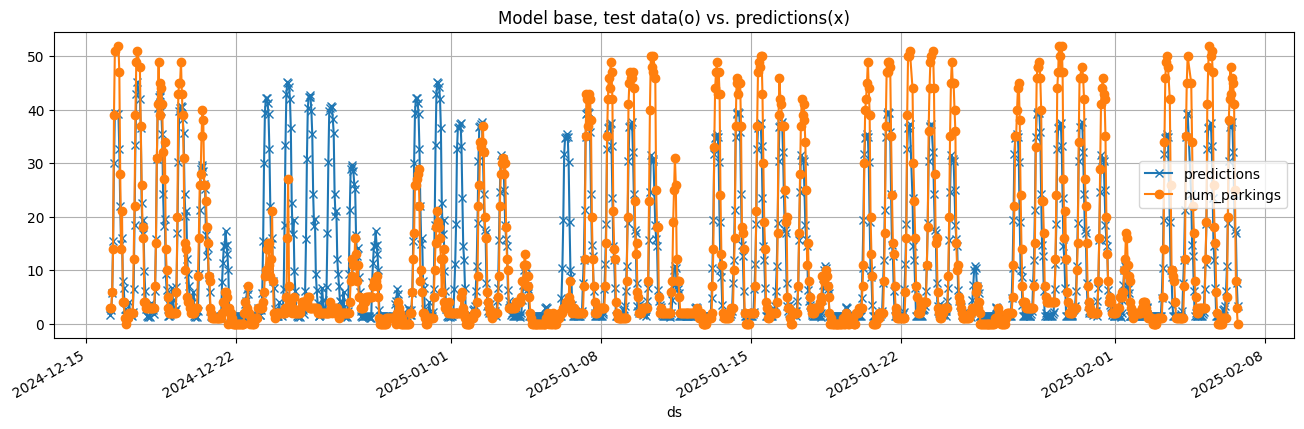

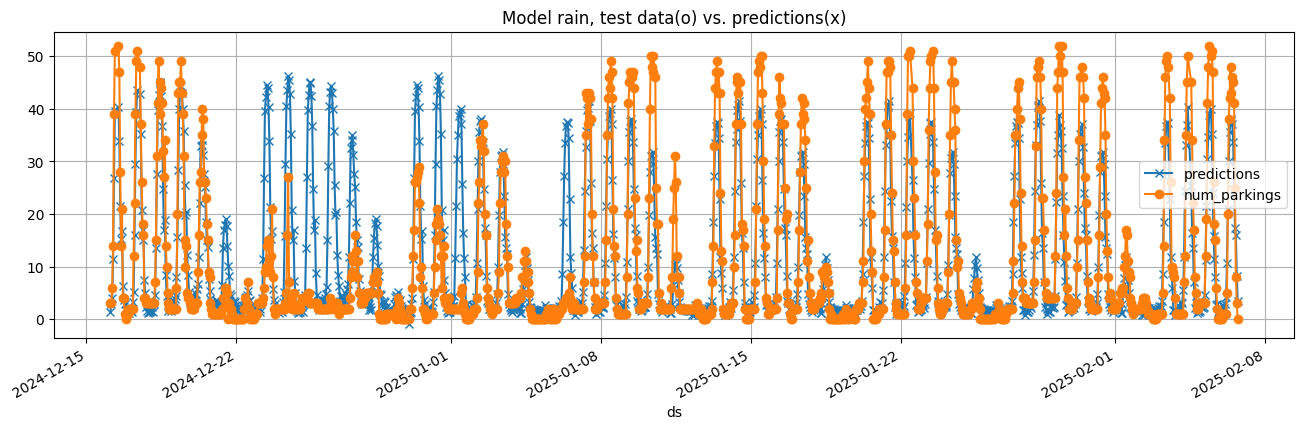

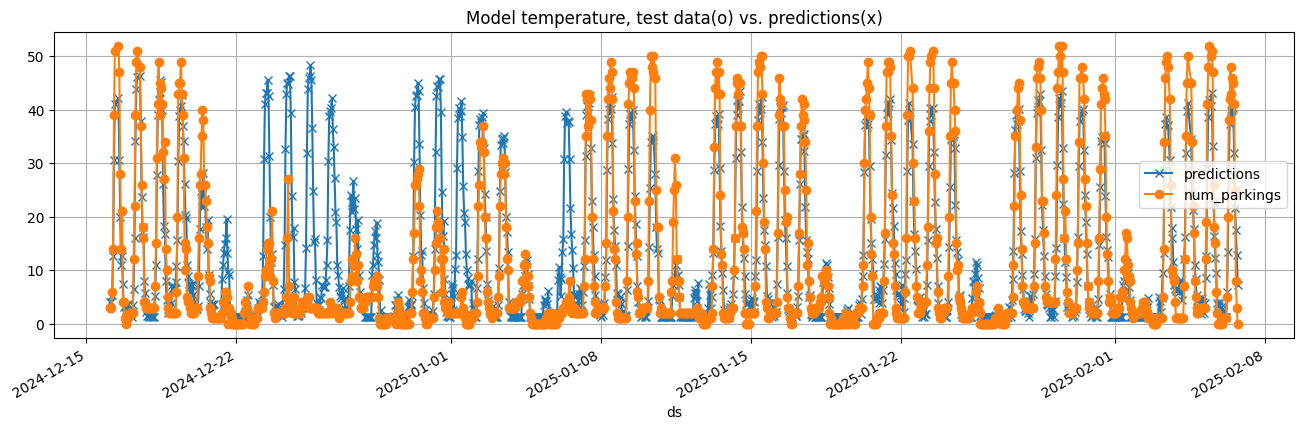

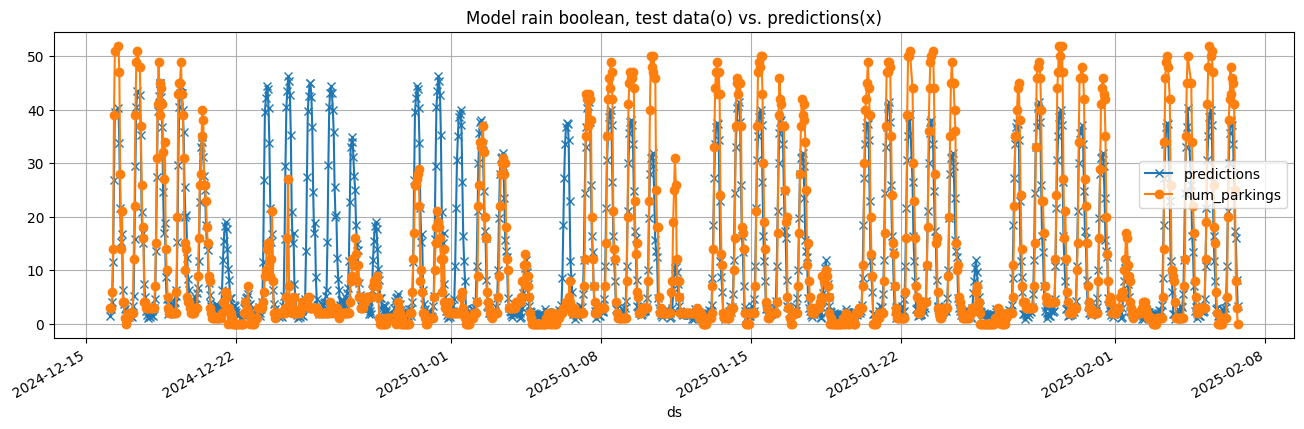

In [20]:
model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",         
    solver="adam",
    learning_rate="constant",               
    max_iter=500,              
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline = get_pipeline(model, standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test, model_name=BASE)

model = MLPRegressor(
    hidden_layer_sizes=(32,164),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN)

model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain_bool = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain_bool, df_rain_bool_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN_BOOL)

model = MLPRegressor(
    hidden_layer_sizes=(32, 16, 4),     
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_temperature = get_pipeline(model, standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test, model_name=TEMPERATURE)

## Make predictions

In [21]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=RAIN_VALUE)
results[RAIN_BOOL] = predict(pipeline_rain_bool, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 7059.
Forecast for parkings in rain: 6691.  Diff to base -368 (-5.21%)
Forecast for parkings in rain boolean: 8133.  Diff to base 1074 (15.21%)
Forecast for parkings in dry weather: 7282.  Diff to base 223 (3.16%)
Forecast for parkings in -20 degrees temperature: 12254.  Diff to base 5195 (73.59%)
Forecast for parkings in -10 degrees temperature: 9782.  Diff to base 2723 (38.57%)
Forecast for parkings in 0 degrees temperature: 8173.  Diff to base 1114 (15.78%)
Forecast for parkings in 10 degrees temperature: 7657.  Diff to base 598 (8.47%)
Forecast for parkings in 20 degrees temperature: 7465.  Diff to base 406 (5.75%)


## Conclusions
### Model Comparison
Mean squared error (model accuracy):
* Model base: 74
* Model rain: 77
* Model rain boolean: 74
* Model temperature: 68 

### Weather Impact Analysis 
Weather impace was measured by forecasting 30 days in future with given static weather values.  Forecast total cars is a sum of all hourly cars in the 30 day period. 
| Condition                      | Forecast | Diff to Base | Percentage Change |
|--------------------------------|----------|-------------|-------------------|
| Base Forecast                  | 7059     | -           | -                  |
| Rain                           | 6691     | -368        | -5.21%            |
| Rain (Boolean)                 | 8133     | 1074        | 15.21%            |
| Dry Weather                    | 7282     | 223         | 3.16%             |
| -20°C Temperature              | 12254    | 5195        | 73.59%            |
| -10°C Temperature              | 9782     | 2723        | 38.57%            |
| 0°C Temperature                | 8173     | 1114        | 15.78%            |
| 10°C Temperature               | 7657     | 598         | 8.47%             |
| 20°C Temperature               | 7465     | 406         | 5.75%             |

1. **Cold Weather Increases Parking Demand Significantly:**  
   - At **-20°C**, parking demand surges by **73.59%** (highest increase).  
   - At **-10°C**, demand is **38.57%** higher than the base.  
   - This suggests that colder temperatures drive more people to use parking, possibly due to reduced walkability or increased car use in extreme cold.  

2. **Mild Temperatures Have a Smaller Impact:**  
   - At **0°C**, demand is up by **15.78%**.  
   - At **10°C**, demand is up **8.47%**, and at **20°C**, it's up **5.75%**.  
   - This indicates a decreasing impact on parking demand as temperatures rise.  

3. **Rain Has Mixed Effects:**  
   - When considering rain as a **continuous variable**, parking demand **drops by 5.21%**.  
   - However, when treated as a **boolean condition** (rain vs. no rain), demand **increases by 15.21%**.  
   - This suggests potential inconsistencies in data interpretation—perhaps light rain reduces demand, while heavy rain increases it.  

4. **Dry Weather Slightly Boosts Demand:**  
   - Parking demand rises **3.16%** in dry weather implying a mild preference for driving in such conditions.  

## Draw predicitions

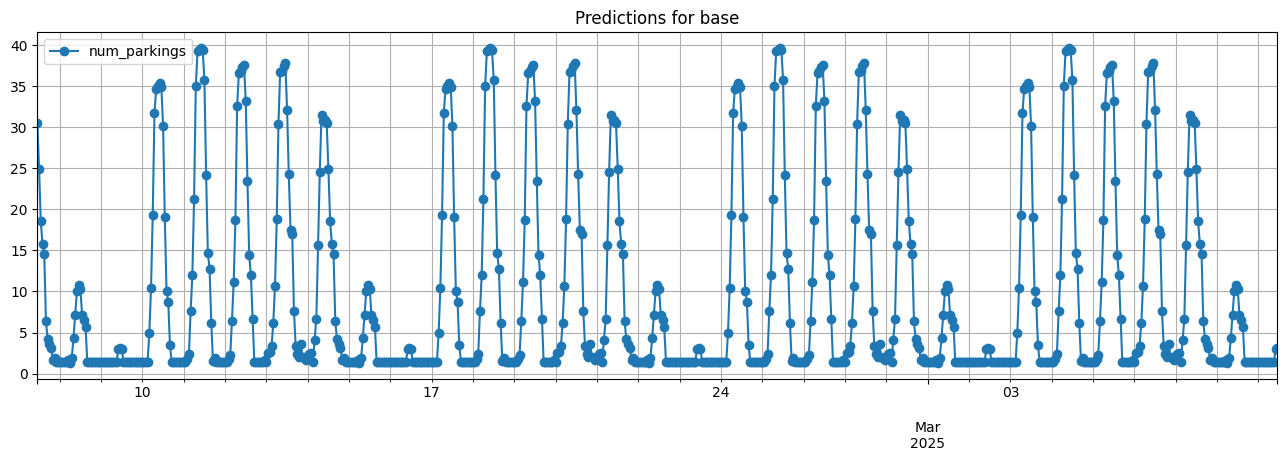

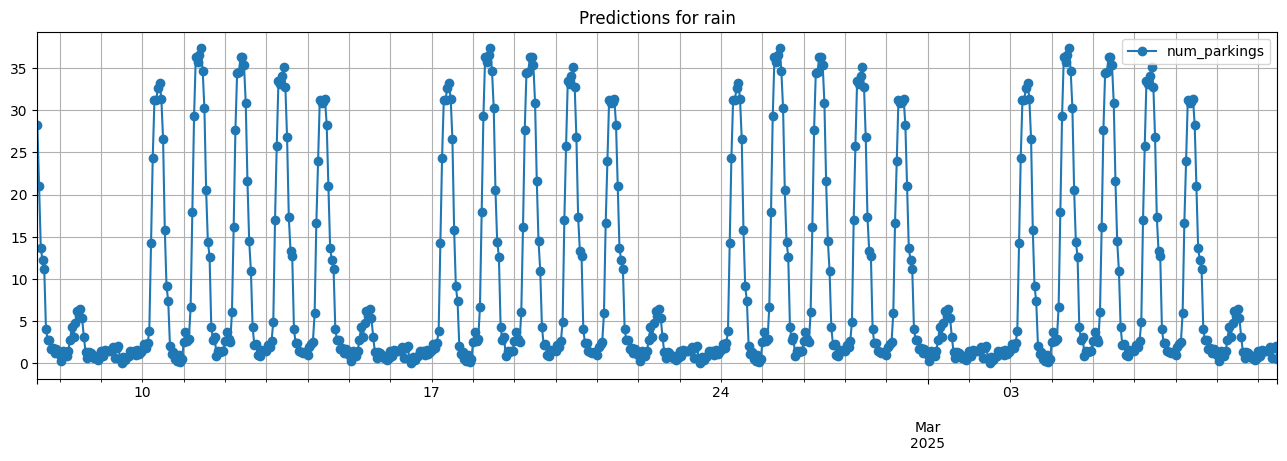

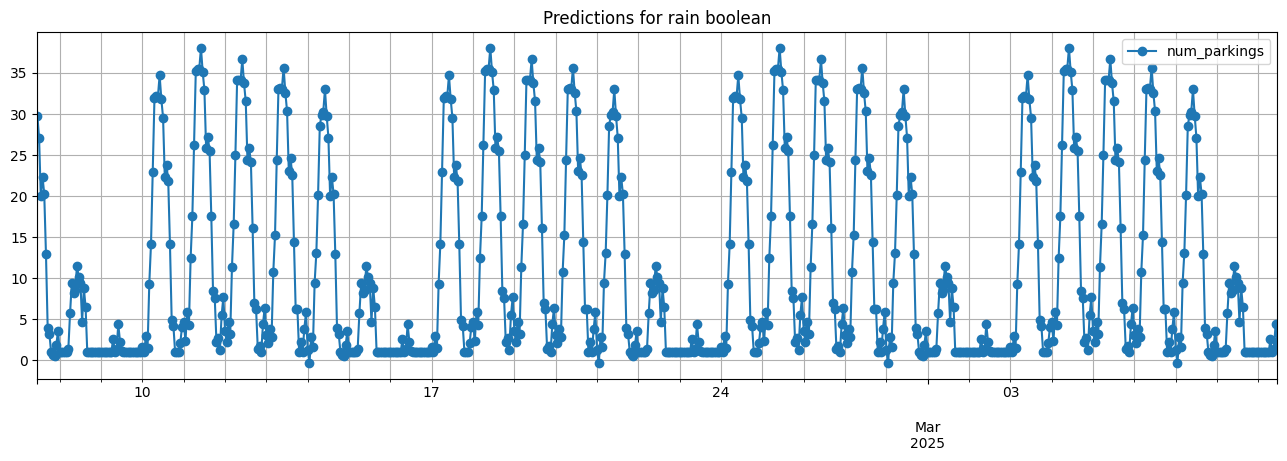

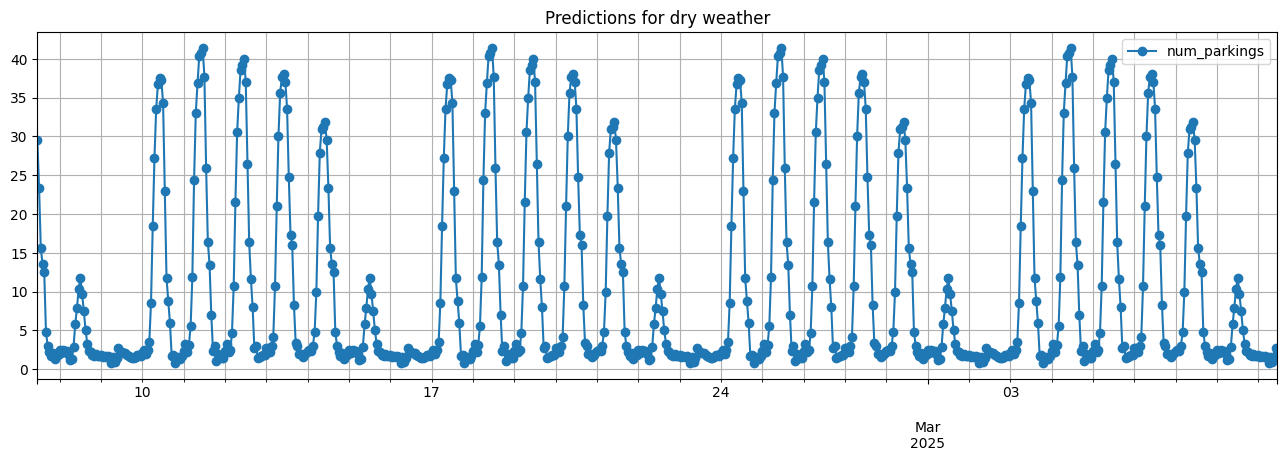

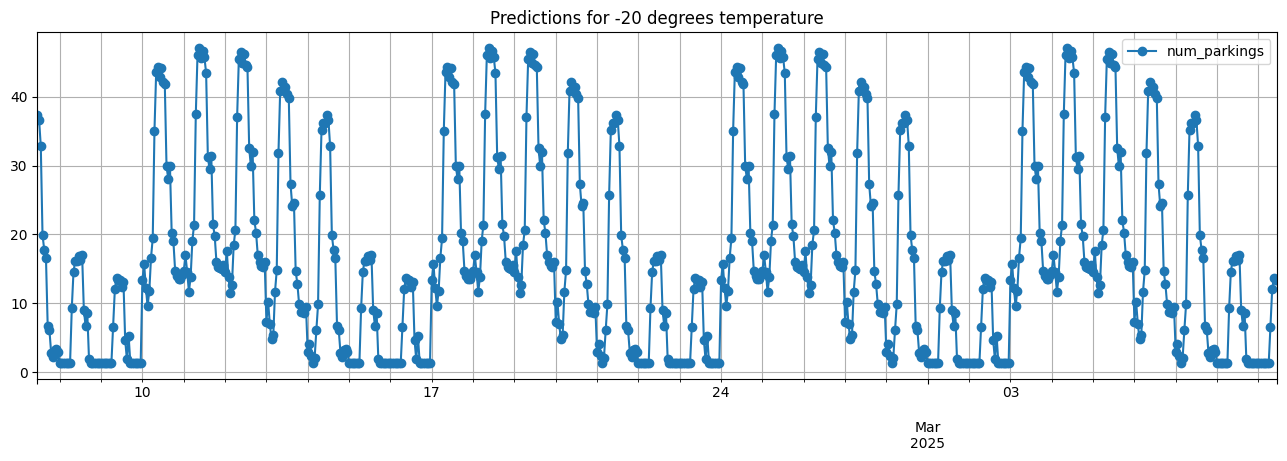

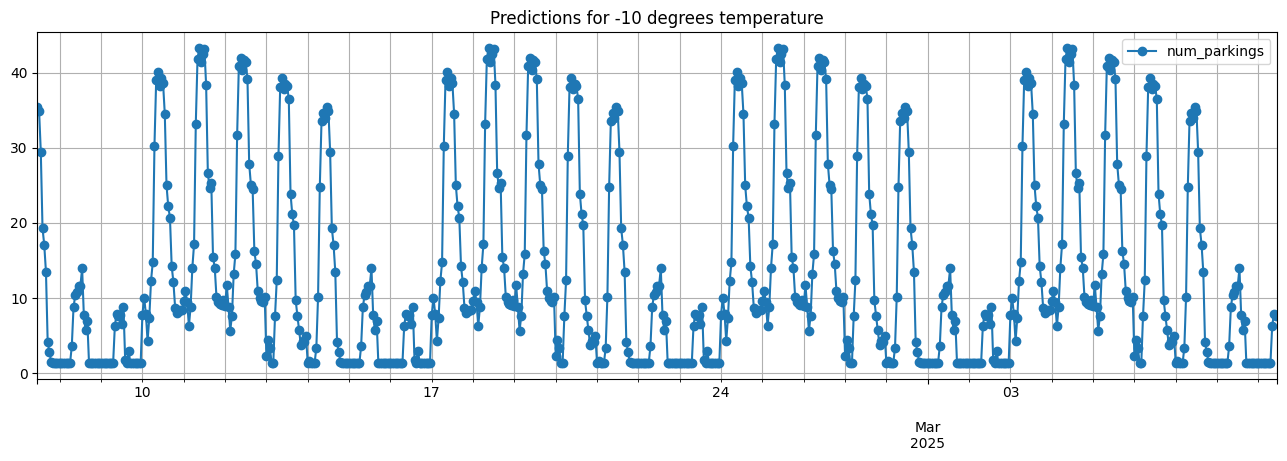

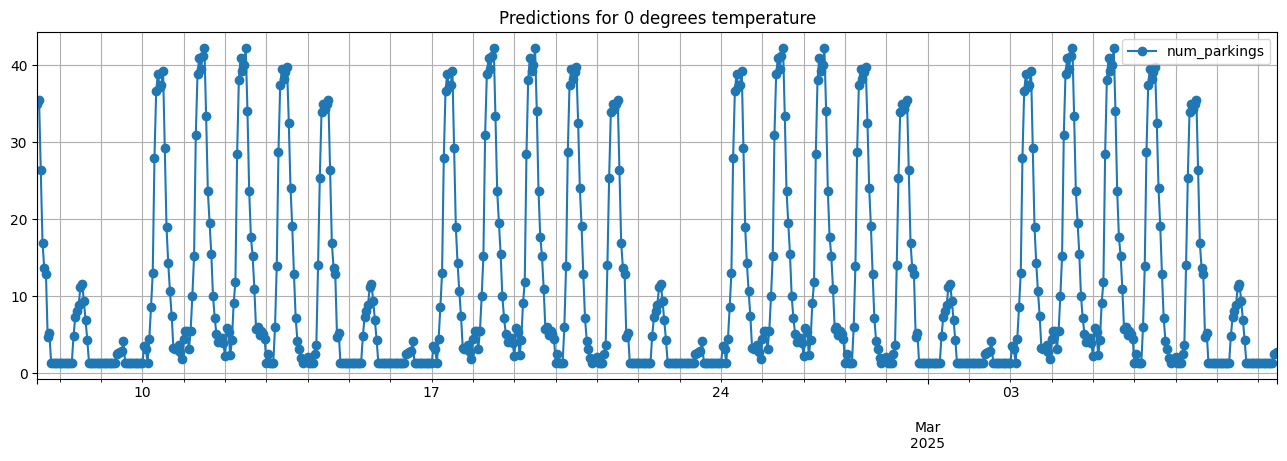

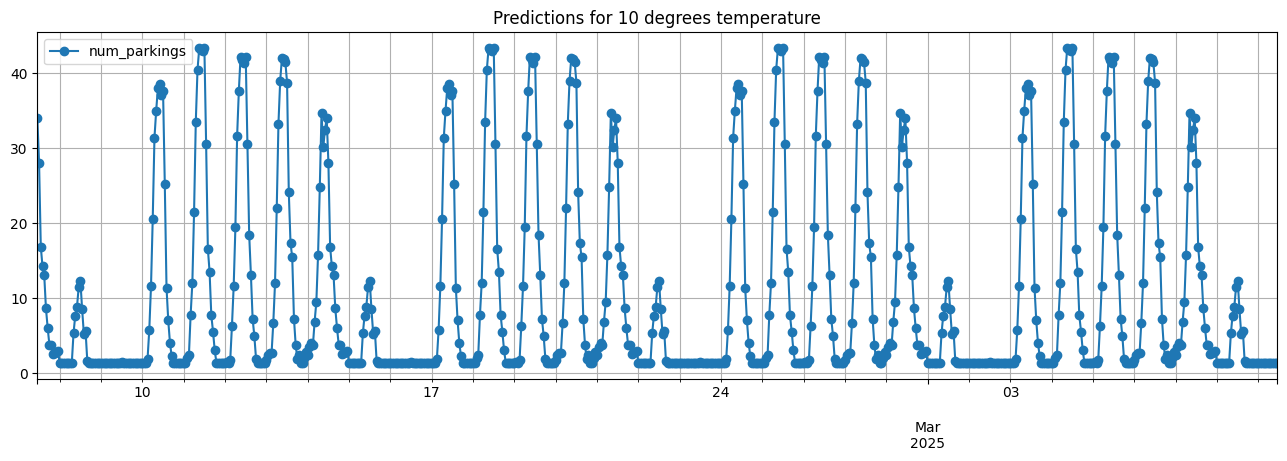

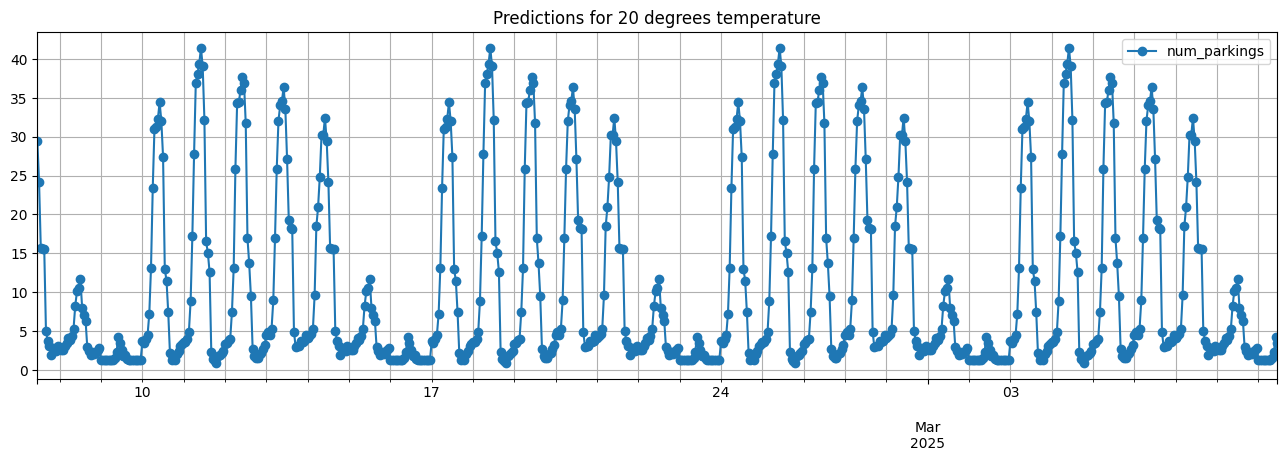

In [22]:
draw_results(results)